# Final Project 

- Dataset: https://www.kaggle.com/PromptCloudHQ/imdb-data
- Notes: https://www.analyticsvidhya.com/blog/2019/04/predicting-movie-genres-nlp-multi-label-classification/
---

## About Dataset


### Movie Dataset 

- 1,000 most popular movies on IMDB in 10 years from 2006-2016. 
- There are 12 Feature: 
    - Title, Genre, Description, Director, Actors, Year, Runtime, Rating, Votes, Revenue, Metascrore
- I am going to train a model that uses the description written about the movie and predict movie genres
    



# Goal: Predicting the Genre of the Movie Using its Description

# Importing the packeges

In [1]:
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# Binary Relevance
from sklearn.multiclass import OneVsRestClassifier
# Performance metric
from sklearn.metrics import f1_score

from sklearn.preprocessing import MultiLabelBinarizer

import matplotlib.pyplot as plt
import seaborn as sns
# % matplotlib inline

from wordcloud import WordCloud, STOPWORDS

### Copying stopwords dictionary E.g. the, a, but, etc.

In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sukhrobjongolibboev/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Data Exploration

### Load Data

In [3]:
# read the file
df = pd.read_csv("movies.csv")

In [4]:
df.head(10) 

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
5,6,The Great Wall,"Action,Adventure,Fantasy",European mercenaries searching for black powde...,Yimou Zhang,"Matt Damon, Tian Jing, Willem Dafoe, Andy Lau",2016,103,6.1,56036,45.13,42.0
6,7,La La Land,"Comedy,Drama,Music",A jazz pianist falls for an aspiring actress i...,Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016,128,8.3,258682,151.06,93.0
7,8,Mindhorn,Comedy,A has-been actor best known for playing the ti...,Sean Foley,"Essie Davis, Andrea Riseborough, Julian Barrat...",2016,89,6.4,2490,NaN,71.0
8,9,The Lost City of Z,"Action,Adventure,Biography","A true-life drama, centering on British explor...",James Gray,"Charlie Hunnam, Robert Pattinson, Sienna Mille...",2016,141,7.1,7188,8.01,78.0
9,10,Passengers,"Adventure,Drama,Romance",A spacecraft traveling to a distant colony pla...,Morten Tyldum,"Jennifer Lawrence, Chris Pratt, Michael Sheen,...",2016,116,7.0,192177,100.01,41.0


In [5]:
# looking at the length of the 1st description to get a picture how long a descriotion can be
word_count = (df["Description"].values[0]).split(" ")
print("list of words from a description: {}\n Word count:{}".format(word_count, len(word_count)))


list of words from a description: ['A', 'group', 'of', 'intergalactic', 'criminals', 'are', 'forced', 'to', 'work', 'together', 'to', 'stop', 'a', 'fanatical', 'warrior', 'from', 'taking', 'control', 'of', 'the', 'universe.']
 Word count:21


### Function removes stopwords to remove noise 

In [6]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# function to remove stopwords
def remove_stopwords(text):
    """Removes stopwords and lowercase the words"""
    no_stopword_text = [word for word in text.split() if not word in stop_words]
    return ' '.join(no_stopword_text)

df['Description'] = df['Description'].apply(lambda x: remove_stopwords(x.lower()))

In [7]:
df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",group intergalactic criminals forced work toge...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","following clues origin mankind, team finds str...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",three girls kidnapped man diagnosed 23 distinc...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","city humanoid animals, hustling theater impres...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",secret government agency recruits dangerous in...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


# Steps:
1. Spliting input and target (input is descriptoin, movie genre would be the output)
2. One-hot encoding 
3. multi-label classification
    - Since movies are not one-dimensional. One movie can span several genres. Now THAT is a challenge I love to embrace as a data scientist. I extracted a bunch of movie plot summaries and got down to work using this concept of multi-label classification. And the results, even using a simple model, are truly impressive.

### Creating a dataset that will be suited to fit our model
- so we can have easier dataset to work with to do train test split part.
- The we have input and output. Independed variable "Description" column and our target, depended variable will  be movie genres we want to predict.

In [8]:
# copying the Description and Genre of a movie
dataset = pd.DataFrame(df[["Description", "Genre"]])

### Overwriting Old Genre Data with New Genres Objects

In [9]:
genres = list()

for item in dataset["Genre"]:
    genres.append(item.split(","))

dataset["Genre"] = genres

### Now we have a desired dataset 

In [10]:
dataset.head(3)

,Description,Genre
0,group intergalactic criminals forced work toge...,"[Action, Adventure, Sci-Fi]"
1,"following clues origin mankind, team finds str...","[Adventure, Mystery, Sci-Fi]"
2,three girls kidnapped man diagnosed 23 distinc...,"[Horror, Thriller]"


In [11]:
# check how many genres we have 

In [14]:
all_genres = list(data_mlb.classes_)
all_genres

['Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Drama',
 'Family',
 'Fantasy',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Sport',
 'Thriller',
 'War',
 'Western']

In [15]:
len(all_genres)

20

- There are 20 unique genre tags in our dataset. But we dont how much each genre occured
We will use FreqDist( ) from the nltk library to create a dictionary of genres 
and their occurrence count across the dataset:



In [16]:
genre_list = dataset["Genre"]
genre_list.tolist()
# flatting the list 
genre_list = [item for sublist in genre_list for item in sublist]
print(len(genre_list))

2555


## Now we have histogram for genres. Let's visualize them.

In [17]:

all_genres = nltk.FreqDist(genre_list) 

# create dataframe
all_genres_df = pd.DataFrame({'Genre': list(all_genres.keys()), 
                              'Count': list(all_genres.values())})


all_genres_df


,Genre,Count
0,Action,303
1,Adventure,259
2,Sci-Fi,120
3,Mystery,106
4,Horror,119
5,Thriller,195
6,Animation,49
7,Comedy,279
8,Family,51
9,Fantasy,101


## Visualize the genres

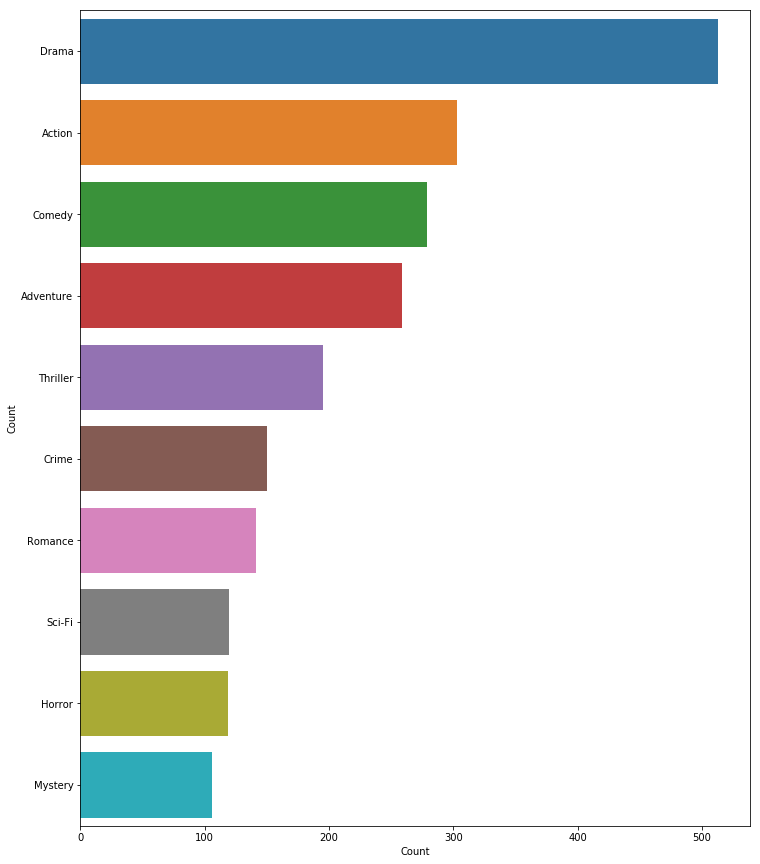

In [18]:
g = all_genres_df.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(12,15)) 
ax = sns.barplot(data=g, x= "Count", y = "Genre") 
ax.set(ylabel = 'Count') 
plt.show()


# Initialize multilabel model 

In [19]:

data_mlb = MultiLabelBinarizer()

data_mlb.fit(dataset['Genre'])


# transform target variable
target = data_mlb.transform(dataset['Genre'])

# Train Test Split

In [20]:
# training and validation set
X_train, X_test, y_train, y_test = train_test_split(dataset["Description"], 
                                                    target, 
                                                    train_size=0.75, 
                                                    test_size=0.25)

# TF-IDF

In [21]:
tfidf_proc = TfidfVectorizer(max_df=0.8, max_features=10000)

X_train_TFIDF = tfidf_proc.fit_transform(X_train)
X_test_TFIDF = tfidf_proc.transform(X_test)

In [22]:
logreg_model = LogisticRegression() # we're still doing classification! 
clf = OneVsRestClassifier(logreg_model)

In [23]:
# fit model on train data
clf.fit(X_train_TFIDF, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
          n_jobs=None)

In [24]:
# make predictions for validation set
y_pred = clf.predict(X_test_TFIDF)

In [25]:
y_pred[:20]

array([[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0,

In [26]:
naive_sample = 22
y_pred[naive_sample]

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### Transform the multi-lable model to word(movie genre) 

In [27]:
data_mlb.inverse_transform(y_pred)[naive_sample]

('Drama',)

## Evaluate the first naive model f1_score

In [28]:
# evaluate performance
f1_score(y_test, y_pred, average="micro")

0.2394736842105263

# Optimizing the model decrease the treshold using .predict_proba()

In [29]:
# predict probabilities
y_pred_proba = clf.predict_proba(X_test_TFIDF)
y_pred_proba

array([[0.24002956, 0.26934555, 0.06297764, ..., 0.17649804, 0.02073164,
        0.01451213],
       [0.29206785, 0.20866574, 0.05253793, ..., 0.19611154, 0.01948696,
        0.013746  ],
       [0.21135154, 0.18611254, 0.05555816, ..., 0.27005836, 0.01888473,
        0.01337763],
       ...,
       [0.19151037, 0.20098562, 0.05120145, ..., 0.16509984, 0.01963649,
        0.01302896],
       [0.29180389, 0.16460697, 0.06243328, ..., 0.24071157, 0.01769498,
        0.01521533],
       [0.18868931, 0.24242667, 0.06506211, ..., 0.18596342, 0.01970987,
        0.01474111]])

In [30]:
threshold = 0.27 # threshold value
y_pred_corrected = (y_pred_proba >= threshold).astype(int)

In [31]:
# evaluate performance
f1_score(y_test, y_pred_corrected, average="micro")
# print("F1 score: ",f1_score )

0.4891740176423416

In [32]:
# now checking the model with new threshold

In [33]:
sample = 34
y_pred_corrected[sample]

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [34]:
data_mlb.inverse_transform(y_pred_corrected)[sample]

('Comedy', 'Drama')

In [35]:
manual_check = 99
print(y_test[manual_check])
print(y_pred_corrected[manual_check])

[1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


# All Predicted Labels

In [36]:
# check the results
iterations = len(y_pred_corrected)
y_pred_transform_to_genre = []
for i in range(iterations):
    y_pred_transform_to_genre.append(data_mlb.inverse_transform(y_pred_corrected)[i])
y_pred_transform_to_genre

[('Comedy', 'Drama'),
 ('Action', 'Comedy', 'Drama'),
 ('Drama', 'Thriller'),
 ('Action', 'Drama'),
 ('Action', 'Adventure', 'Drama'),
 ('Action', 'Adventure', 'Drama'),
 ('Comedy', 'Drama'),
 ('Comedy', 'Drama'),
 ('Action', 'Adventure', 'Comedy', 'Drama'),
 ('Action', 'Comedy', 'Drama'),
 ('Action', 'Adventure', 'Drama'),
 ('Comedy', 'Drama'),
 ('Action', 'Drama'),
 ('Comedy', 'Drama'),
 ('Action', 'Comedy', 'Drama'),
 ('Action', 'Comedy', 'Drama'),
 ('Comedy', 'Drama'),
 ('Drama',),
 ('Drama',),
 ('Action', 'Drama'),
 ('Action', 'Drama'),
 ('Adventure', 'Comedy', 'Drama'),
 ('Action', 'Drama'),
 ('Comedy', 'Drama'),
 ('Action', 'Comedy', 'Drama'),
 ('Action', 'Comedy', 'Crime', 'Drama'),
 ('Action', 'Comedy', 'Drama'),
 ('Action', 'Adventure', 'Comedy', 'Drama'),
 ('Action', 'Drama'),
 ('Action', 'Adventure', 'Drama'),
 ('Action', 'Adventure', 'Drama'),
 ('Comedy', 'Drama'),
 ('Action', 'Drama'),
 ('Comedy', 'Drama'),
 ('Comedy', 'Drama'),
 ('Action', 'Adventure', 'Comedy', 'Drama')

In [37]:
# data_mlb

## Create Word Cloud

In [38]:
def create_wordcloud(dataset):
    text = " ".join(desc for desc in dataset)
    wordcloud = WordCloud(width=1500, height=800, max_font_size=200, background_color = 'White').generate(text)
    plt.figure(figsize=(20,15))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

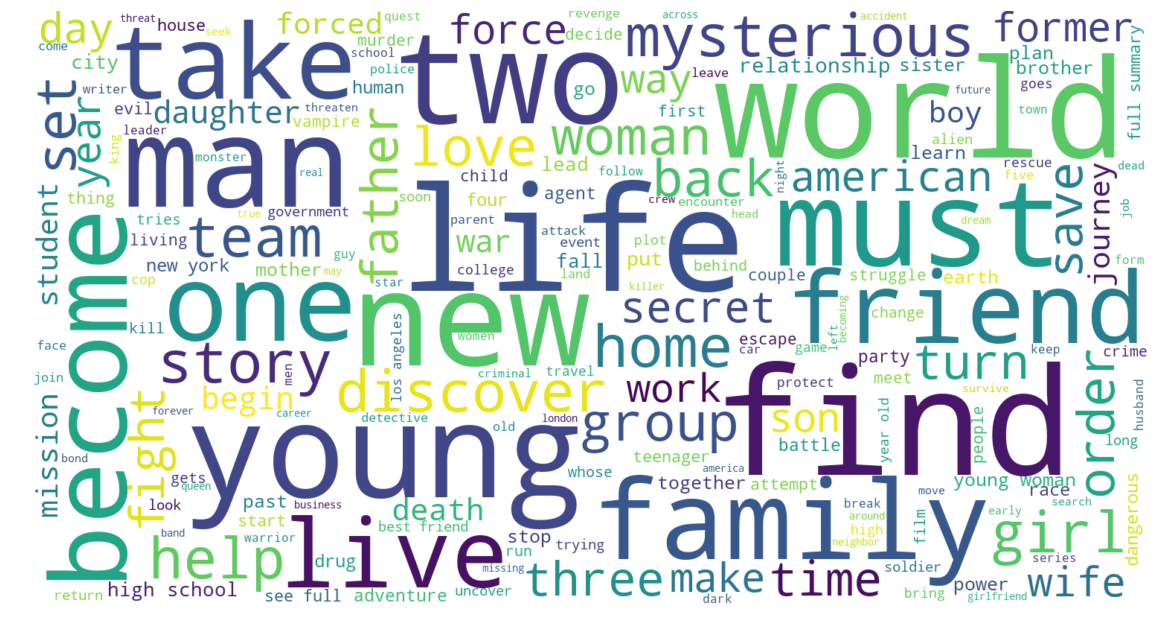

In [39]:
create_wordcloud(dataset["Description"])

# Next Steps:
1. Test multiple different classification models!
2. Use `GridSearchCV` or Custom Hyperparameter Tuning to Boost Performance!
3. More EDA and Visualization!

In [ ]:
# # Super cool code! 

# Another way to perform **multilabel binarization** without the package!

In [ ]:
# label_binarization = dataset.Genre.str.split(',', expand=True).stack()
# mlb_data = pd.get_dummies(label_binarization, prefix='is').groupby(level=0).sum()
# dataset = dataset.join(mlb_data)
# dataset.drop(columns=["Genre"], inplace=True)

#### put cell from  `all_genres = list(data_mlb.classes_)` `Visualize the genres`